In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    connection = sqlite3.connect("../data/checking-logs.sqlite")

    query_commits = """
    SELECT
        DATE(timestamp) as date,
        CASE
            WHEN TIME(timestamp) >= '00:00:00' AND TIME(timestamp) <= '03:59:59' THEN 'Night'
            WHEN TIME(timestamp) >= '04:00:00' AND TIME(timestamp) <= '09:59:59' THEN 'Morning'
            WHEN TIME(timestamp) >= '10:00:00' AND TIME(timestamp) <= '16:59:59' THEN 'Day'
            WHEN TIME(timestamp) >= '17:00:00' AND TIME(timestamp) <= '23:59:59' THEN 'Evening'
        END AS time_period,
        COUNT(*) AS count
    FROM checker
    WHERE uid LIKE 'user_%'
    GROUP BY date, time_period
    ORDER BY date,
        CASE
            WHEN time_period = 'Night' THEN 1
            WHEN time_period = 'Moning' THEN 2
            WHEN time_period = 'Day' THEN 3
            WHEN time_period = 'Evening' THEN 4
        END
    """

    df_times = pd.read_sql(query_commits, connection)
    print(df_times)

except FileNotFoundError as e:
    print("File not found")
    raise e


          date time_period  count
0   2020-04-17     Morning     13
1   2020-04-17         Day     10
2   2020-04-18     Morning      1
3   2020-04-18         Day     33
4   2020-04-18     Evening     35
..         ...         ...    ...
85  2020-05-20         Day     11
86  2020-05-20     Evening     10
87  2020-05-21     Morning      1
88  2020-05-21         Day     27
89  2020-05-21     Evening     21

[90 rows x 3 columns]


In [3]:
pivot_table = df_times.pivot_table(
    index='date',
    columns='time_period',
    values='count',
    fill_value=0
)
column_order = ['Night', 'Morning', 'Day', 'Evening']
pivot_table = pivot_table.reindex(columns=column_order, fill_value=0)

print("Данные:")
print(pivot_table)
print()

Данные для визуализации:
time_period  Night  Morning    Day  Evening
date                                       
2020-04-17     0.0     13.0   10.0      0.0
2020-04-18     0.0      1.0   33.0     35.0
2020-04-19     2.0      4.0   16.0     11.0
2020-04-20     0.0      0.0   12.0     13.0
2020-04-21     0.0      0.0    0.0     25.0
2020-04-22     0.0      0.0    4.0     24.0
2020-04-23     2.0      6.0   15.0     20.0
2020-04-24     0.0      0.0    4.0     12.0
2020-04-25     1.0     21.0   33.0     49.0
2020-04-26     2.0      8.0   86.0    165.0
2020-04-27     2.0      2.0    0.0      2.0
2020-04-28     0.0      0.0    5.0      0.0
2020-04-29     0.0      0.0    0.0     17.0
2020-04-30     0.0      4.0   13.0     36.0
2020-05-01     0.0      1.0    9.0     50.0
2020-05-02     0.0      6.0  200.0     36.0
2020-05-03     0.0     24.0   86.0     70.0
2020-05-04     0.0      5.0   32.0      0.0
2020-05-05     0.0     14.0  120.0      5.0
2020-05-06     0.0      2.0    0.0      0.0
2020-05

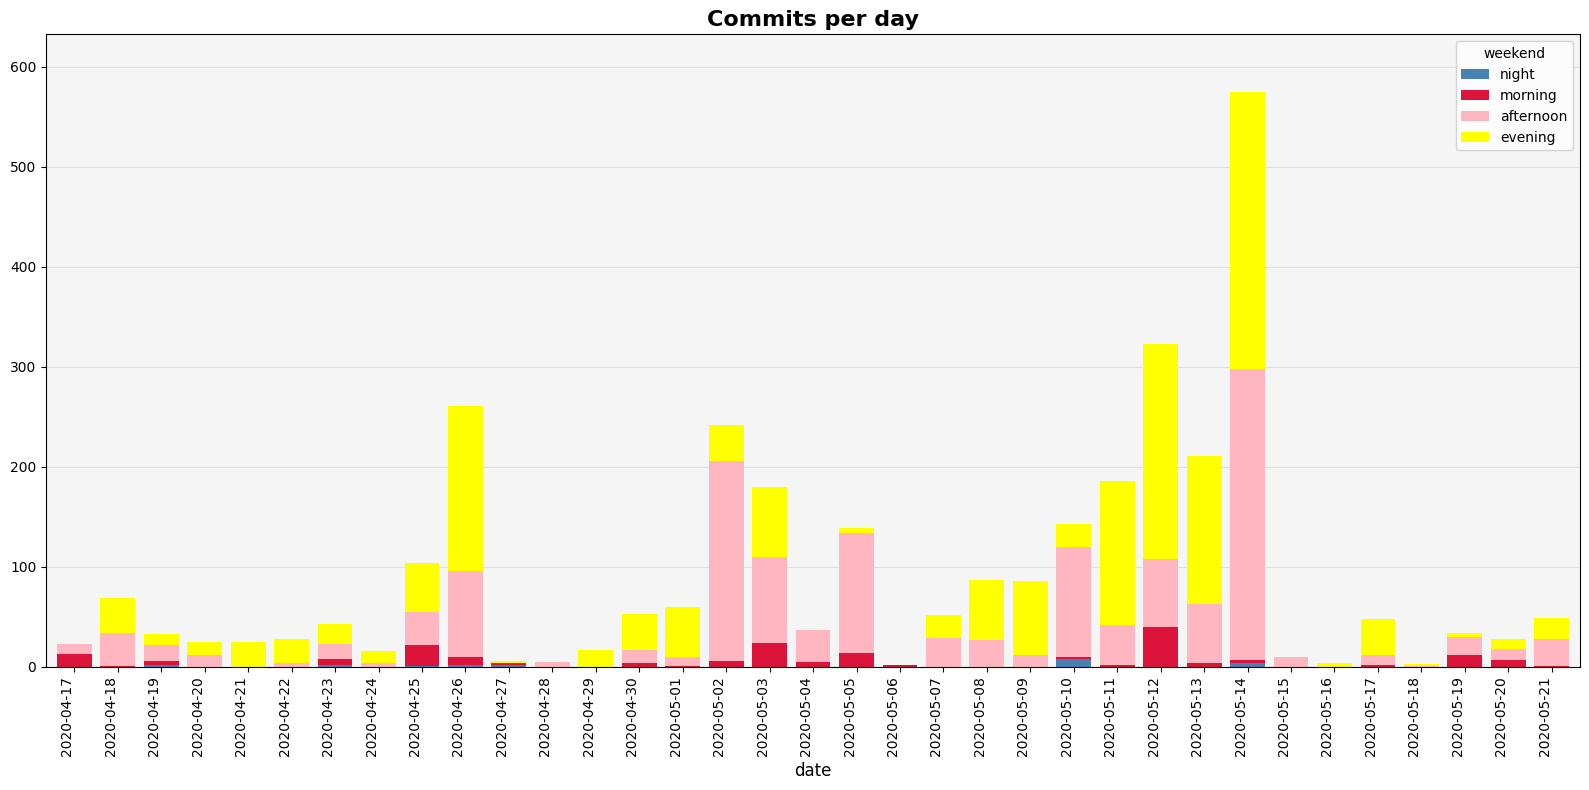

In [4]:
fig, ax = plt.subplots(figsize=(16, 8))

colors = {
    'Night': '#4682B4',      # Синий
    'Morning': '#DC143C',    # Красный
    'Day': '#FFB6C1',  # Розовый
    'Evening': '#FFFF00'     # Желтый
}


ax = pivot_table.plot(kind='bar',
                     stacked=True,
                     figsize=(16, 8),
                     color=[colors[col] for col in pivot_table.columns],
                     width=0.8,
                     ax=ax)

# Настройка внешнего вида
ax.set_title('Commits per day', fontsize=16, fontweight='bold')
ax.set_xlabel('date', fontsize=12)

# Настройка легенды
ax.legend(title='weekend',
         labels=['night', 'morning', 'afternoon', 'evening'],
         loc='upper right',
         frameon=True)

# Настройка осей
ax.set_xticklabels(pivot_table.index, ha='right')

# Добавляем сетку
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)

# Устанавливаем пределы оси Y
max_value = pivot_table.sum(axis=1).max()
if max_value > 0:
    ax.set_ylim(0, max_value * 1.1)
else:
    ax.set_ylim(0, 10)

# Настройка фона
ax.set_facecolor('#F5F5F5')
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()

In [5]:
connection.close()

**Вопрос** Когда наши пользователи обычно выполняют лабораторные работы: ночью, утром, днем или вечером? <br>**Ответ**: днем и вечером


В какой день у нас наибольшее количество коммитов и в то же время количество коммитов вечером больше, чем днем? Ответ: 12 мая 2025
